In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd


data = pd.read_csv('/content/drive/My Drive/CSE475/train.csv')




In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB
None


In [ ]:

pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357255 sha256=48ecb8714ce551da585b975936971ef42993d59a4f59c7072b05db0778bb3b02
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split



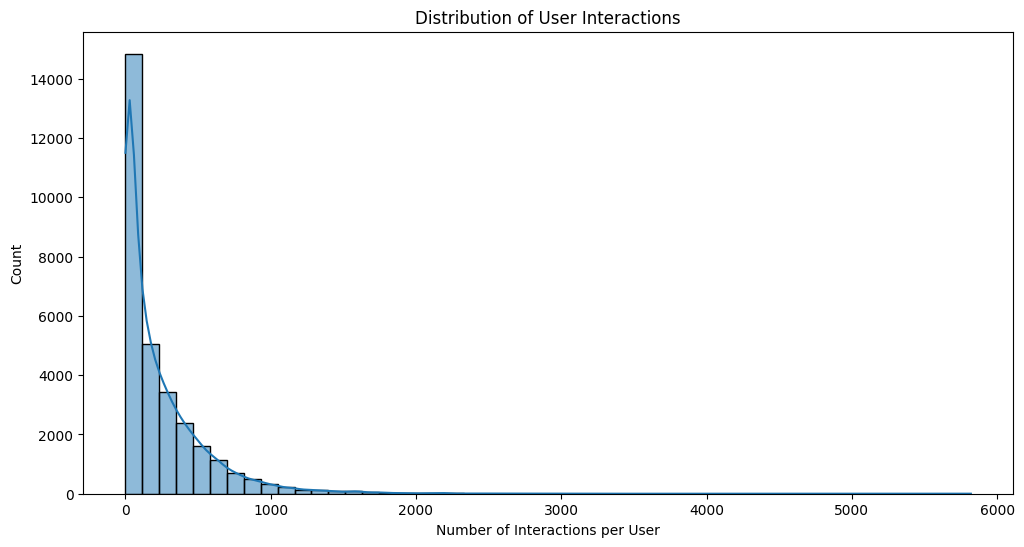

In [ ]:
# Count the number of interactions per user
user_interactions = data['msno'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(user_interactions, bins=50, kde=True)
plt.title('Distribution of User Interactions')
plt.xlabel('Number of Interactions per User')
plt.ylabel('Count')
plt.show()


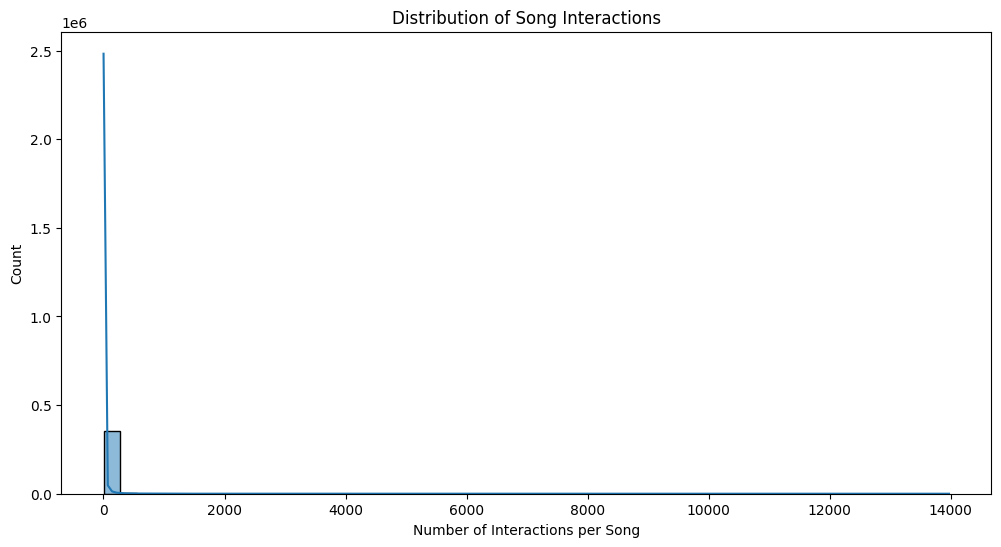

In [ ]:
# Count the number of interactions per song
song_interactions = data['song_id'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(song_interactions, bins=50, kde=True)
plt.title('Distribution of Song Interactions')
plt.xlabel('Number of Interactions per Song')
plt.ylabel('Count')
plt.show()


In [ ]:
pip install scikit-surprise


In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

# Load the data
data = pd.read_csv('/content/drive/My Drive/CSE475/train.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Create a Surprise Dataset
reader = Reader(rating_scale=(data['target'].min(), data['target'].max()))
surprise_data = Dataset.load_from_df(data[['msno', 'song_id', 'target']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(surprise_data, test_size=0.25)


                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist       1  
4              Explore  onli

In [ ]:
from surprise import SVD

# Initialize the SVD model
svd = SVD()

# Train the model on the training set
svd.fit(trainset)


In [ ]:
# Function to get recommendations for a user
def get_recommendations(user_id, n_recommendations=10):
    # Get a list of all song_ids in the dataset
    all_song_ids = data['song_id'].unique()

    # Predict ratings for all songs for the given user
    predictions = [svd.predict(user_id, song_id) for song_id in all_song_ids]

    # Sort the predictions by the estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top n recommendations
    top_predictions = predictions[:n_recommendations]

    # Extract the song IDs and estimated ratings
    recommended_songs = [(pred.iid, pred.est) for pred in top_predictions]

    return recommended_songs

# Example usage:
user_id = 'some_user_id'
recommendations = get_recommendations(user_id)
print(recommendations)


[('I/cSGrFFtgt4+KTXLz75A55kPvR2pE1ByekEiPeUhc4=', 0.9026676476167201), ('7vcLpc/FKi7OBLamwx0pNsNvPajH2hJj/tY2lMt0zWs=', 0.8735051236500162), ('7hdvjoOwihYVHdUx5wxhr5shAUbRJTjQqoGNFzjts48=', 0.8496125775198209), ('DXsdxO0nRUycEsTz979KyO1bxBQN/gU+la35xyigBaY=', 0.8388167238641142), ('Rlt7/baO1qajpGBFFVvtEL57Y/GA3JXkOpS5VvMiDeY=', 0.8376729782284412), ('cNwAk7jaVWOBEpyd6LLGanFGds+xhs7kNyZddWTxCG8=', 0.8359049572244448), ('V+La7ppNO3p2EhVDZkhQPzvM2ddpBUA5zDgDcLaaIcw=', 0.8323306133566901), ('aTWsuYOo1VMwUoCmWbdxsAU6FL6xjdbNMxUhmAsaFt4=', 0.8315033902583836), ('cQQchj9bgOhGnW1B1oHk24T/zmyljE7e1qrzG+rcMCc=', 0.8297516773056475), ('eM2NFWRMIH0o43LQRQgP2vEdprgA2vsnFxb3P3ZtXxw=', 0.8292729766463287)]


In [ ]:
from surprise import accuracy

# Predict ratings for the test set
test_predictions = svd.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(test_predictions)
print(f'RMSE: {rmse}')


RMSE: 0.4563
RMSE: 0.4562918517181928


In [ ]:
# Function to calculate precision, recall, and F1 score
def precision_recall_f1(predictions, threshold=0.5):
    # Define true positives, false positives, false negatives
    tp = 0
    fp = 0
    fn = 0

    for pred in predictions:
        actual = pred.r_ui
        predicted = pred.est >= threshold

        if actual == 1 and predicted == 1:
            tp += 1
        elif actual == 0 and predicted == 1:
            fp += 1
        elif actual == 1 and predicted == 0:
            fn += 1

    # Calculate precision, recall, and F1 score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

# Calculate precision, recall, and F1 score for the test set
precision, recall, f1 = precision_recall_f1(test_predictions)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.6881270544560478
Recall: 0.6397663262964787
F1 Score: 0.6630660624350356


In [ ]:
# Sample song metadata dataframe
song_metadata = pd.DataFrame({
    'song_id': ['song_id1', 'song_id2', 'song_id3'],
    'title': ['Song Title 1', 'Song Title 2', 'Song Title 3'],
    'artist': ['Artist 1', 'Artist 2', 'Artist 3']
})

# Merge the original data with the metadata
data = pd.merge(data, song_metadata, on='song_id', how='left')


In [ ]:
def get_recommendations(user_id, n_recommendations=10):
    # Get a list of all song_ids in the dataset
    all_song_ids = data['song_id'].unique()

    # Predict ratings for all songs for the given user
    predictions = [svd.predict(user_id, song_id) for song_id in all_song_ids]

    # Sort the predictions by the estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top n recommendations
    top_predictions = predictions[:n_recommendations]

    # Extract the song IDs and estimated ratings
    recommended_songs = [(pred.iid, pred.est) for pred in top_predictions]

    # Create a DataFrame for the recommended songs
    recommended_df = pd.DataFrame(recommended_songs, columns=['song_id', 'predicted_rating'])

    # Merge with the song metadata to get titles and artists
    recommended_df = recommended_df.merge(song_metadata, on='song_id', how='left')

    return recommended_df

# Example usage:
user_id = 'some_user_id'
recommendations = get_recommendations(user_id)
print(recommendations)


                                        song_id  predicted_rating title artist
0  I/cSGrFFtgt4+KTXLz75A55kPvR2pE1ByekEiPeUhc4=          0.902668   NaN    NaN
1  7vcLpc/FKi7OBLamwx0pNsNvPajH2hJj/tY2lMt0zWs=          0.873505   NaN    NaN
2  7hdvjoOwihYVHdUx5wxhr5shAUbRJTjQqoGNFzjts48=          0.849613   NaN    NaN
3  DXsdxO0nRUycEsTz979KyO1bxBQN/gU+la35xyigBaY=          0.838817   NaN    NaN
4  Rlt7/baO1qajpGBFFVvtEL57Y/GA3JXkOpS5VvMiDeY=          0.837673   NaN    NaN
5  cNwAk7jaVWOBEpyd6LLGanFGds+xhs7kNyZddWTxCG8=          0.835905   NaN    NaN
6  V+La7ppNO3p2EhVDZkhQPzvM2ddpBUA5zDgDcLaaIcw=          0.832331   NaN    NaN
7  aTWsuYOo1VMwUoCmWbdxsAU6FL6xjdbNMxUhmAsaFt4=          0.831503   NaN    NaN
8  cQQchj9bgOhGnW1B1oHk24T/zmyljE7e1qrzG+rcMCc=          0.829752   NaN    NaN
9  eM2NFWRMIH0o43LQRQgP2vEdprgA2vsnFxb3P3ZtXxw=          0.829273   NaN    NaN


In [ ]:
# Example usage:
user_id = 'some_user_id'
recommendations = get_recommendations(user_id)
print(recommendations)


                                        song_id  predicted_rating title artist
0  I/cSGrFFtgt4+KTXLz75A55kPvR2pE1ByekEiPeUhc4=          0.924717   NaN    NaN
1  aTWsuYOo1VMwUoCmWbdxsAU6FL6xjdbNMxUhmAsaFt4=          0.873614   NaN    NaN
2  cQQchj9bgOhGnW1B1oHk24T/zmyljE7e1qrzG+rcMCc=          0.865814   NaN    NaN
3  eaxR8ESct6krK4Ym7Uupq7B6ymiJztSiW3GF8FYj1Pk=          0.862845   NaN    NaN
4  HFZHtEN4OBV1x4mZLNvJ7k9m03JdmAtuS40IYImzHj8=          0.855899   NaN    NaN
5  BnqneikV0xfEqhTOybK0HFeGzepLGeVjq0vSQ1J94Wc=          0.851935   NaN    NaN
6  yYz3zUfUyInM7MJL0zW5LMqmn7W3lRTXEmENhFpJ+FA=          0.846683   NaN    NaN
7  fs6F3W35deZogHK7WfzixMOHtXBtS0LuILTIyksXk7c=          0.839702   NaN    NaN
8  fihM6wGko4iUzUSZNzZJJTBonapMMG6l6gm9Bc9xSjY=          0.836382   NaN    NaN
9  6uoPanw2OnPBEE3lcQKlMhiwenV+vZ6yoqtuE8NAGOg=          0.835079   NaN    NaN


In [ ]:
# Define a function to get recommendations based on a given song name
def get_recommendations_by_song_name(song_name, n_recommendations=10):
    # Find the song_id corresponding to the given song name
    song_id = song_metadata[song_metadata['title'] == song_name]['song_id'].values[0]

    # Predict ratings for all users for the given song
    predictions = [svd.predict(user_id, song_id) for user_id in data['msno'].unique()]

    # Sort the predictions by the estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top n recommendations
    top_predictions = predictions[:n_recommendations]

    # Extract the user IDs and estimated ratings
    recommended_users = [(pred.uid, pred.est) for pred in top_predictions]

    return recommended_users

# Example usage:
song_name = 'Song Title 1'
recommendations_by_song_name = get_recommendations_by_song_name(song_name)
print(recommendations_by_song_name)


[('EKYUj/q03mTk+vpUSIkFBHzEShBnKOUMN32WHIN0G2g=', 1), ('NWTpcboxYYU5ZY7eh02JH70+T79rhIEGeWaJHCy1oUY=', 0.9847696320040324), ('iY5U26P1jvimGGO/6Y5yKb2L/Sl/S/jViXzPX09fK68=', 0.9764789762299146), ('jdJAk1ldbv+15mziwsvfc4/Hoz7kdW9b8F7OvY1Hog8=', 0.9659747562632168), ('NP2UR4TiSfPDMgGYpe8fTwrmo/e/VD8PVf0pzlsPQ9s=', 0.9647182018785401), ('WGUj+1odpnJ+64DU3NHR6BTvCYX/rn8SSrhbXjN/KWI=', 0.961976098816848), ('8eyWJ+EjTTATSBnmQXFYew3AbXyea3B2Q62un3M+U20=', 0.9607595358126759), ('0KWxcC0L57SG0nLvA+APYKqykzIDLZB6HTqCZrzZgrE=', 0.9590050611898269), ('SMy4Sxcf/2yp5nUS4tZKPFMlC26g3nwsk9AsMm7tRqA=', 0.951639528945582), ('8mLxR5ZFnKu+0uwMWA0Gwa0STWlcjhW/WPbElCRJJ+s=', 0.951472779951188)]
